In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from plot_conf import *

Using Theano backend.
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
plot_data = np.load('./train_hist/2017-07-07/some_NN.npy')

/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


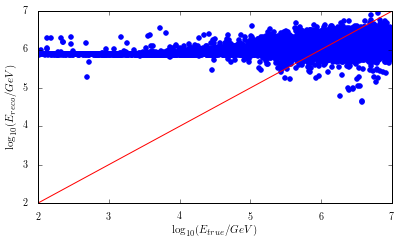

In [3]:
fig, ax= newfig(0.9)
ax.scatter(plot_data[1], plot_data[0], color='blue')
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
ax.set_xlim(2,7)
ax.set_ylim(2,7)
#plt.savefig('latest_network.pdf')
plt.show()

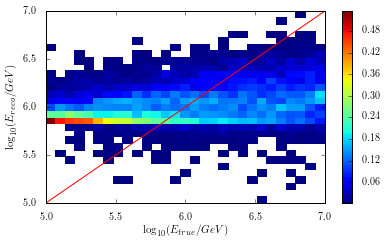

In [6]:

H, xedges, yedges = np.histogram2d(plot_data[1], plot_data[0], bins=(np.linspace(5,7,30), np.linspace(5,7,30)))
H=np.array([np.array(i)/np.sum(i) for i in H])
H = H.T  # Let each row list bins with common y range.
fig, ax = newfig(0.9)
X, Y = np.meshgrid(xedges, yedges)
ax.plot(np.linspace(5,7,10), np.linspace(5,7,10),color='red')
H= np.ma.array(H)
H.mask = H == 0
cbar = ax.pcolormesh(X, Y, H)
plt.colorbar(cbar)
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
#plt.savefig('latest_network_density.pdf')
plt.show()



In [57]:
epoche = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,0:1])
loss = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,2:3])
val_loss = np.concatenate(np.genfromtxt('./train_hist/history2.csv', delimiter=',')[1:,4:5])

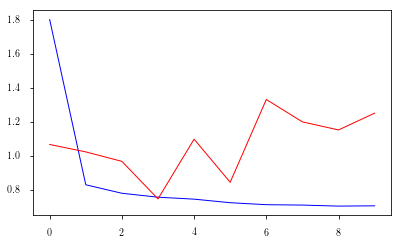

In [59]:
plt.plot(epoche, loss, color = 'blue')
plt.plot(epoche, val_loss, color = 'red')
plt.show()